<a href="https://colab.research.google.com/github/Tj-dev-py/Machine-Learning-Projects/blob/main/Titanic_Classification_version_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
train_path = '/content/titanic_train.csv'
test_path = '/content/titanic_test.csv'

from IPython.display import display

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

display(train_data.head(), train_data.shape,
        test_data.head(), test_data.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

# Handling Missing Values

In [ ]:
# seperating target from predictors

label = train_data.Survived
train_data = train_data.drop('Survived', axis=1)

# combining both dataframes

full_data = pd.concat([train_data, test_data], axis=0)
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
full_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
# percentage of missing values
(full_data.isnull().sum() / len(full_data)) * 100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [ ]:
len(full_data)

1309

## Notes

1. Survival is the label
2. PassengerId is a unique identifier
3. Pclass is a categorical column
4. SibSp is the number of sibplings, spouses and could be a categorical or numerical column
5. Same applies to the Parch (parent children) column
6. Fare has outliers
7. Ticket contains ticket number and should be parsed or broken down into categories like ticket type, number and so on 
8. Cabin has a lot of missing values
9. Embarked is categorical
10. Sex is categorical

In [ ]:
# number of unique values
full_data.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [ ]:
# drop the cabin column and impute the age, Fare, Embarked column

full_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
full_data.Age = full_data.Age.fillna(full_data.Age.median())

In [ ]:
full_data['Fare'] = full_data.Fare.fillna(full_data.Fare.median())
full_data['Embarked'] = full_data.Embarked.fillna(full_data.Embarked.mode()[0])

In [ ]:
full_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Feature Importances

In [ ]:
X = full_data[:len(train_data)].copy()
y = label.copy()

X.shape, y.shape

((891, 10), (891,))

In [ ]:
for colname in X.select_dtypes('object'):
  X[colname], _ = X[colname].factorize()

In [ ]:
# all the important features

forest_clf = RandomForestClassifier()
forest_clf.fit(X, y)

feature_importances = pd.DataFrame({'features':X.columns,'feature_importance':forest_clf.feature_importances_})
feature_importances.sort_values('feature_importance', ascending=False)

,features,feature_importance
3,Sex,0.239011
8,Fare,0.159830
4,Age,0.120520
2,Name,0.109257
7,Ticket,0.108741
0,PassengerId,0.105453
1,Pclass,0.079102
5,SibSp,0.029438
6,Parch,0.024375
9,Embarked,0.024273


In [ ]:
X = pd.concat([X, y], axis=1)
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,0,0,22.0,1,0,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,1,71.2833,1,1
2,3,3,2,1,26.0,0,0,2,7.9250,0,1
3,4,1,3,1,35.0,1,0,3,53.1000,0,1
4,5,3,4,0,35.0,0,0,4,8.0500,0,0


In [ ]:
X.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.106811
Parch          0.081629
Name          -0.005007
PassengerId   -0.005007
SibSp         -0.035322
Ticket        -0.047298
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

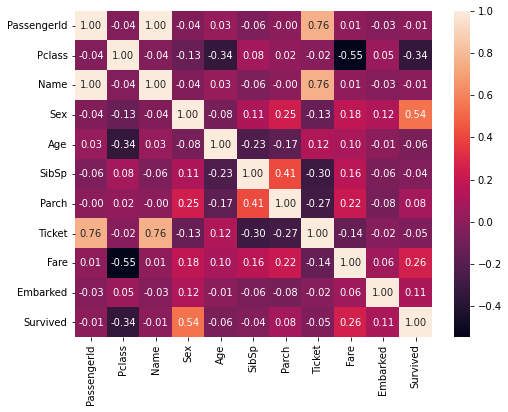

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, fmt='.2f')
plt.show()

# Sex Column

In [ ]:
# Sex column one hot encoded

full_data = pd.concat([full_data, pd.get_dummies(full_data.Sex)], axis=1)
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


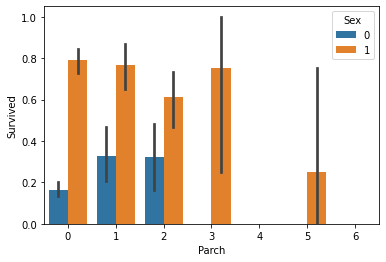

In [ ]:
sns.barplot(x=X.Parch, y=X.Survived, hue=X.Sex)

plt.show()

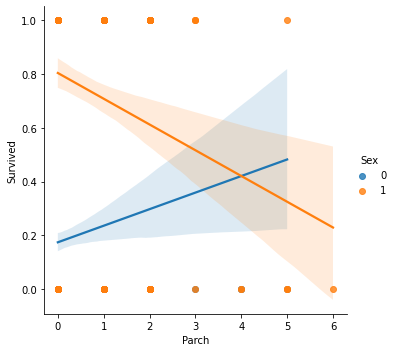

In [ ]:
sns.lmplot(x='Parch', y='Survived', hue='Sex', data=X)

In [ ]:
full_data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

In [ ]:
full_data.Parch.value_counts().sort_values()

9       2
6       2
5       6
4       6
3       8
2     113
1     170
0    1002
Name: Parch, dtype: int64

In [ ]:
# Group Sex by Parch

full_data['Sex_and_Parch'] = (full_data['Sex'] + ' and ' + full_data['Parch'].astype(str) + ' parents or children')

full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Number_of_siblings
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 1 sibling
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599,Pclass 1 and paid between 0 to 73 dollars,Fare amount 71.2833 and Age 38.0,middle_aged,Fare amount 71.2833 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 1 sibling
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3,3101282,STON/O2.,female and ticket STON/O2. 3101282,female and ticket classification STON/O2.,female and ticket_number 3101282,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.925 and Age 26.0,young,Fare amount 7.925 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 0 sibling
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,113803,None,female and ticket 113803,female and ticket classification None,female and ticket_number 113803,Pclass 1 and paid between 0 to 73 dollars,Fare amount 53.1 and Age 35.0,middle_aged,Fare amount 53.1 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 1 sibling
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,373450,None,male and ticket 373450,male and ticket classification None,male and ticket_number 373450,Pclass 3 and paid between 0 to 73 dollars,Fare amount 8.05 and Age 35.0,middle_aged,Fare amount 8.05 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 0 sibling


In [ ]:
# some people have payed more than 31 dollars
full_data['Fare'][full_data['Fare'] >= 31].unique()

array([ 71.2833,  53.1   ,  51.8625,  31.275 ,  35.5   ,  31.3875,
       263.    , 146.5208,  82.1708,  52.    ,  41.5792,  39.6875,
        76.7292,  61.9792,  46.9   ,  80.    ,  83.475 ,  73.5   ,
        56.4958,  47.1   ,  34.375 ,  61.175 ,  34.6542,  63.3583,
        77.2875, 247.5208,  79.2   ,  36.75  ,  66.6   ,  61.3792,
        69.55  ,  55.    ,  33.5   ,  39.    ,  50.    ,  31.    ,
       113.275 ,  76.2917,  90.    ,  52.5542,  86.5   , 512.3292,
        79.65  , 153.4625, 135.6333,  77.9583,  78.85  ,  91.0792,
       151.55  , 110.8833, 108.9   ,  56.9292,  83.1583, 262.375 ,
       164.8667, 134.5   ,  57.9792, 133.65  ,  35.    ,  75.25  ,
        69.3   ,  55.4417, 211.5   , 227.525 , 120.    ,  32.5   ,
        55.9   ,  81.8583,  89.1042,  38.5   ,  49.5042,  78.2667,
        59.4   ,  34.0208,  93.5   , 221.7792, 106.425 ,  49.5   ,
        71.    ,  39.6   ,  51.4792,  40.125 ,  33.    ,  42.4   ,
        65.    ,  32.3208, 211.3375,  57.    ,  37.0042,  39.4

In [ ]:
# dicretize Fare column

full_data['Fare_group'] = pd.cut(full_data.Fare, 7, 
       labels=['paid between 0 to 73 dollars', 'paid between 73 to 146 dollars',
               'paid between 146 to 219 dollars', 'paid between 219 to 292 dollars', 
               'paid between 292 to 365 dollars', 'paid between 365 to 439 dollars', 
               'paid between 439 to 512 dollars'])
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 children,paid between 0 to 73 dollars
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 children,paid between 0 to 73 dollars
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 children,paid between 0 to 73 dollars
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 children,paid between 0 to 73 dollars
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 children,paid between 0 to 73 dollars


In [ ]:
(full_data['Sex'] + ' and ' + full_data['Fare_group'].astype(str))

0          male and paid between 0 to 73 dollars
1        female and paid between 0 to 73 dollars
2        female and paid between 0 to 73 dollars
3        female and paid between 0 to 73 dollars
4          male and paid between 0 to 73 dollars
                         ...                    
413        male and paid between 0 to 73 dollars
414    female and paid between 73 to 146 dollars
415        male and paid between 0 to 73 dollars
416        male and paid between 0 to 73 dollars
417        male and paid between 0 to 73 dollars
Length: 1309, dtype: object

In [ ]:
# Group Sex and Fare

full_data['Sex_and_Fare_group'] = (full_data['Sex'] + ' and ' + full_data['Fare_group'].astype(str))
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars


In [ ]:
# Sex and Pclass

full_data['Sex_and_Pclass'] = (full_data['Sex'] + ' and class ' + full_data['Pclass'].astype(str))
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3


In [ ]:
# Sex and Ticket
full_data.Ticket

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1309, dtype: object

In [ ]:
TicketGroup1 = full_data['Ticket'].str.extract(r' (\d+)')
TicketGroup2 = full_data['Ticket'].str.extract(r'(\d+)')

In [ ]:
TicketGroup1

,0
0,21171
1,17599
2,3101282
3,NaN
4,NaN
...,...
413,3236
414,17758
415,3101262
416,NaN


In [ ]:
TicketGroup2

,0
0,5
1,17599
2,2
3,113803
4,373450
...,...
413,5
414,17758
415,3101262
416,359309


In [ ]:
Ticket_Numbers = TicketGroup1.fillna(TicketGroup2)
Ticket_Numbers

,0
0,21171
1,17599
2,3101282
3,113803
4,373450
...,...
413,3236
414,17758
415,3101262
416,359309


In [ ]:
Ticket_Numbers.columns = ['Numbers']

In [ ]:
Ticket_Numbers = pd.Series(Ticket_Numbers.Numbers)
Ticket_Numbers

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
413       3236
414      17758
415    3101262
416     359309
417       2668
Name: Numbers, Length: 1309, dtype: object

In [ ]:
full_data = pd.concat([full_data, Ticket_Numbers], axis=1)

In [ ]:
full_data['Ticket_Classification'] = full_data.Ticket.str.extract(r'(.+) (?=\d+)').fillna('None')
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Numbers,Ticket_Classification
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3,3101282,STON/O2.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,113803,None
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,373450,None


In [ ]:
full_data.columns = full_data.columns.str.replace('Numbers', 'Ticket_Numbers')
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3,3101282,STON/O2.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,113803,None
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,373450,None


In [ ]:
full_data['Sex_and_ticket'] = (full_data['Sex'] + ' and ticket ' + full_data['Ticket'].astype(str))

full_data['Sex_and_ticket_classification'] = (full_data['Sex'] + ' and ticket classification ' + full_data['Ticket_Classification'].astype(str))

full_data['Sex_and_ticket_number'] = (full_data['Sex'] + ' and ticket_number ' + full_data['Ticket_Numbers'].astype(str))


In [ ]:
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3,3101282,STON/O2.,female and ticket STON/O2. 3101282,female and ticket classification STON/O2.,female and ticket_number 3101282
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,113803,None,female and ticket 113803,female and ticket classification None,female and ticket_number 113803
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,373450,None,male and ticket 373450,male and ticket classification None,male and ticket_number 373450


# Fare Column

In [ ]:
# Pclass and Fare_group

full_data['Pclass_and_Fare_group'] = ('Pclass ' + full_data['Pclass'].astype(str) + ' and ' + full_data['Fare_group'].astype(str))


In [ ]:
full_data['Fare_and_Age'] = ('Fare amount ' + full_data['Fare'].astype(str) + ' and Age ' + full_data['Age'].astype(str))

In [ ]:
full_data['Age_group'] = pd.cut(full_data['Age'], 5, labels=['very_young', 'young', 'middle_aged', 'old', 'very_old'])

In [ ]:
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599,Pclass 1 and paid between 0 to 73 dollars,Fare amount 71.2833 and Age 38.0,middle_aged
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3,3101282,STON/O2.,female and ticket STON/O2. 3101282,female and ticket classification STON/O2.,female and ticket_number 3101282,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.925 and Age 26.0,young
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,113803,None,female and ticket 113803,female and ticket classification None,female and ticket_number 113803,Pclass 1 and paid between 0 to 73 dollars,Fare amount 53.1 and Age 35.0,middle_aged
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,373450,None,male and ticket 373450,male and ticket classification None,male and ticket_number 373450,Pclass 3 and paid between 0 to 73 dollars,Fare amount 8.05 and Age 35.0,middle_aged


In [ ]:
full_data['Fare_and_Age_group'] = ('Fare amount ' + 
                                   full_data['Fare'].astype(str) + ' and ' + 
                                   full_data['Age_group'].astype(str))

In [ ]:
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599,Pclass 1 and paid between 0 to 73 dollars,Fare amount 71.2833 and Age 38.0,middle_aged,Fare amount 71.2833 and middle_aged
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3,3101282,STON/O2.,female and ticket STON/O2. 3101282,female and ticket classification STON/O2.,female and ticket_number 3101282,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.925 and Age 26.0,young,Fare amount 7.925 and young
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,113803,None,female and ticket 113803,female and ticket classification None,female and ticket_number 113803,Pclass 1 and paid between 0 to 73 dollars,Fare amount 53.1 and Age 35.0,middle_aged,Fare amount 53.1 and middle_aged
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,373450,None,male and ticket 373450,male and ticket classification None,male and ticket_number 373450,Pclass 3 and paid between 0 to 73 dollars,Fare amount 8.05 and Age 35.0,middle_aged,Fare amount 8.05 and middle_aged


In [ ]:
full_data['Fare_group_and_Age_group'] = (
                                   full_data['Fare_group'].astype(str) + ' and ' + 
                                   full_data['Age_group'].astype(str))

In [ ]:
full_data['Fare_group_and_SipSp'] = (
                                   full_data['Fare_group'].astype(str) + ' and ' + 
                                   full_data['SibSp'].astype(str) + ' siblings or spouses ')

In [ ]:
full_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Number_of_siblings
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 1 sibling
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599,Pclass 1 and paid between 0 to 73 dollars,Fare amount 71.2833 and Age 38.0,middle_aged,Fare amount 71.2833 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 1 sibling
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3,3101282,STON/O2.,female and ticket STON/O2. 3101282,female and ticket classification STON/O2.,female and ticket_number 3101282,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.925 and Age 26.0,young,Fare amount 7.925 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 0 sibling


In [ ]:
full_data['Fare_group_and_Parch'] = (full_data['Fare_group'].astype(str) + ' and ' + 
                                   full_data['SibSp'].astype(str) + ' parents or children')

In [ ]:
full_data['Fare_and_Ticket_Classification'] = (full_data['Fare_group'].astype(str) + ' and' + 
                                   ' Ticket class ' + full_data['Ticket_Classification'].astype(str))

# Age Column

In [ ]:
full_data['Age_group_and_Pclass'] = (full_data['Age_group'].astype(str) + ' and Class '  + full_data['Pclass'].astype(str))

In [ ]:
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Parch,Fare_and_Ticket_Classification,Age_group_and_Pclass,Fare_group_and_SipSp
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class A/5,young and Class 3,paid between 0 to 73 dollars and 1 siblings or...
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599,Pclass 1 and paid between 0 to 73 dollars,Fare amount 71.2833 and Age 38.0,middle_aged,Fare amount 71.2833 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class PC,middle_aged and Class 1,paid between 0 to 73 dollars and 1 siblings or...
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3,3101282,STON/O2.,female and ticket STON/O2. 3101282,female and ticket classification STON/O2.,female and ticket_number 3101282,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.925 and Age 26.0,young,Fare amount 7.925 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 0 parents or ...,paid between 0 to 73 dollars and Ticket class ...,young and Class 3,paid between 0 to 73 dollars and 0 siblings or...
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,113803,None,female and ticket 113803,female and ticket classification None,female and ticket_number 113803,Pclass 1 and paid between 0 to 73 dollars,Fare amount 53.1 and Age 35.0,middle_aged,Fare amount 53.1 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class ...,middle_aged and Class 1,paid between 0 to 73 dollars and 1 siblings or...
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,373450,None,male and ticket 373450,male and ticket classification None,male and ticket_number 373450,Pclass 3 and paid between 0 to 73 dollars,Fare amount 8.05 and Age 35.0,middle_aged,Fare amount 8.05 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 0 parents or ...,paid between 0 to 73 dollars and Ticket class ...,middle_aged and Class 3,paid between 0 to 73 dollars and 0 siblings or...


In [ ]:
full_data['Age_group_and_SibSp'] = (full_data['Age_group'].astype(str) + ' and '  + full_data['Pclass'].astype(str) + ' siblings or spouses')

In [ ]:
full_data['Age_group_and_Parch'] = (full_data['Age_group'].astype(str) + ' and '  + full_data['Parch'].astype(str) + ' parents or children')

# Name Column

In [ ]:
full_data['Title'] = full_data['Name'].str.split('[,.]').str[1]

In [ ]:
full_data['First_name'] = full_data['Name'].str.split('[,.]').str[0]
full_data['Last_name'] = full_data['Name'].str.split('[,.]').str[2]

In [ ]:
full_data['Title_and_Id'] = ('Title' + full_data['Title'].astype(str) + ' and Id ' +
                             full_data['PassengerId'].astype(str))

full_data['First_name_and_Id'] = ('First Name ' + full_data['First_name'].astype(str) + ' and Id ' +
                             full_data['PassengerId'].astype(str))

full_data['Last_name_and_Id'] = ('Last Name ' + full_data['Last_name'].astype(str) + ' and Id ' +
                             full_data['PassengerId'].astype(str))

In [ ]:
full_data['Title_and_Ticket_Numbers'] = ('Title' + full_data['Title'].astype(str) + ' and number ' +
                             full_data['Ticket_Numbers'].astype(str))

full_data['First_name_and_Ticket_Numbers'] = ('First Name ' + full_data['First_name'].astype(str) + ' and number ' +
                             full_data['Ticket_Numbers'].astype(str))

full_data['Last_name_and_Ticket_Numbers'] = ('Last Name ' + full_data['Last_name'].astype(str) + ' and number ' +
                             full_data['Ticket_Numbers'].astype(str))


full_data['Title_and_Ticket_Classification'] = ('Title' + full_data['Title'].astype(str) + ' and class ' +
                             full_data['Ticket_Classification'].astype(str))

full_data['First_name_and_Ticket_Classification'] = ('First Name ' + full_data['First_name'].astype(str) + ' and class ' +
                             full_data['Ticket_Classification'].astype(str))

full_data['Last_name_and_Ticket_Classification'] = ('Last Name ' + full_data['Last_name'].astype(str) + ' and class ' +
                             full_data['Ticket_Classification'].astype(str))

In [ ]:
full_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Parch,Fare_and_Ticket_Classification,Age_group_and_Pclass,Fare_group_and_SipSp,Age_group_and_SibSp,Age_group_and_Parch,Title,First_name,Last_name,Title_and_Id,First_name_and_Id,Last_name_and_Id,Title_and_Ticket_Numbers,First_name_and_Ticket_Numbers,Last_name_and_Ticket_Numbers,Title_and_Ticket_Classification,First_name_and_Ticket_Classification,Last_name_and_Ticket_Classification
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class A/5,young and Class 3,paid between 0 to 73 dollars and 1 siblings or...,young and 3 siblings or spouses,young and 0 parents or children,Mr,Braund,Owen Harris,Title Mr and Id 1,First Name Braund and Id 1,Last Name Owen Harris and Id 1,Title Mr and number 21171,First Name Braund and number 21171,Last Name Owen Harris and number 21171,Title Mr and class A/5,First Name Braund and class A/5,Last Name Owen Harris and class A/5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599,Pclass 1 and paid between 0 to 73 dollars,Fare amount 71.2833 and Age 38.0,middle_aged,Fare amount 71.2833 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class PC,middle_aged and Class 1,paid between 0 to 73 dollars and 1 siblings or...,middle_aged and 1 siblings or spouses,middle_aged and 0 parents or children,Mrs,Cumings,John Bradley (Florence Briggs Thayer),Title Mrs and Id 2,First Name Cumings and Id 2,Last Name John Bradley (Florence Briggs Thaye...,Title Mrs and number 17599,First Name Cumings and number 17599,Last Name John Bradley (Florence Briggs Thaye...,Title Mrs and class PC,First Name Cumings and class PC,Last Name John Bradley (Florence Briggs Thaye...


# Ticket Column

In [ ]:
full_data['Ticket_number_and_PassengerId'] = ('Ticket Number ' + full_data['Ticket_Numbers'].astype(str) + ' and Id ' +
                             full_data['PassengerId'].astype(str))
full_data['Ticket_classification_and_PassengerId'] = ('Ticket Classification ' + full_data['Ticket_Classification'].astype(str) + ' and Id ' +
                             full_data['PassengerId'].astype(str))

In [ ]:
full_data['Ticket_number_and_SibSP'] = ('Ticket Number ' + full_data['Ticket_Numbers'].astype(str) + ' and siblings or spouses ' +
                             full_data['SibSp'].astype(str))
full_data['Ticket_classification_and_SibSp'] = ('Ticket Classification ' + full_data['Ticket_Classification'].astype(str) + ' and siblings or spouses ' +
                             full_data['SibSp'].astype(str))

In [ ]:
full_data['Ticket_number_and_Parch'] = ('Ticket Number ' + full_data['Ticket_Numbers'].astype(str) + ' and parents or children ' +
                             full_data['Parch'].astype(str))
full_data['Ticket_classification_and_SibSp'] = ('Ticket Classification ' + full_data['Ticket_Classification'].astype(str) + ' and parents or children ' +
                             full_data['SibSp'].astype(str))

In [ ]:
full_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Parch,Fare_and_Ticket_Classification,Age_group_and_Pclass,Fare_group_and_SipSp,Age_group_and_SibSp,Age_group_and_Parch,Title,First_name,Last_name,Title_and_Id,First_name_and_Id,Last_name_and_Id,Title_and_Ticket_Numbers,First_name_and_Ticket_Numbers,Last_name_and_Ticket_Numbers,Title_and_Ticket_Classification,First_name_and_Ticket_Classification,Last_name_and_Ticket_Classification,Ticket_number_and_PassengerId,Ticket_classification_and_PassengerId,Ticket_number_and_SibSP,Ticket_classification_and_SibSp,Ticket_number_and_Parch
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class A/5,young and Class 3,paid between 0 to 73 dollars and 1 siblings or...,young and 3 siblings or spouses,young and 0 parents or children,Mr,Braund,Owen Harris,Title Mr and Id 1,First Name Braund and Id 1,Last Name Owen Harris and Id 1,Title Mr and number 21171,First Name Braund and number 21171,Last Name Owen Harris and number 21171,Title Mr and class A/5,First Name Braund and class A/5,Last Name Owen Harris and class A/5,Ticket Number 21171 and Id 1,Ticket Classification A/5 and Id 1,Ticket Number 21171 and siblings or spouses 1,Ticket Classification A/5 and parents or child...,Ticket Number 21171 and parents or children 0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599,Pclass 1 and paid between 0 to 73 dollars,Fare amount 71.2833 and Age 38.0,middle_aged,Fare amount 71.2833 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class PC,middle_aged and Class 1,paid between 0 to 73 dollars and 1 siblings or...,middle_aged and 1 siblings or spouses,middle_aged and 0 parents or children,Mrs,Cumings,John Bradley (Florence Briggs Thayer),Title Mrs and Id 2,First Name Cumings and Id 2,Last Name John Bradley (Florence Briggs Thaye...,Title Mrs and number 17599,First Name Cumings and number 17599,Last Name John Bradley (Florence Briggs Thaye...,Title Mrs and class PC,First Name Cumings and class PC,Last Name John Bradley (Florence Briggs Thaye...,Ticket Number 17599 and Id 2,Ticket Classification PC and Id 2,Ticket Number 17599 and siblings or spouses 1,Ticket Classification PC and parents or childr...,Ticket Number 17599 and parents or children 0


# SibSp Column

In [ ]:
full_data['SibSp_and_Parch'] = ('Siblings or spouses ' + full_data['SibSp'].astype(str) + ' and parents or children ' +
                             full_data['Parch'].astype(str))

In [ ]:
full_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Parch,Fare_and_Ticket_Classification,Age_group_and_Pclass,Fare_group_and_SipSp,Age_group_and_SibSp,Age_group_and_Parch,Title,First_name,Last_name,Title_and_Id,First_name_and_Id,Last_name_and_Id,Title_and_Ticket_Numbers,First_name_and_Ticket_Numbers,Last_name_and_Ticket_Numbers,Title_and_Ticket_Classification,First_name_and_Ticket_Classification,Last_name_and_Ticket_Classification,Ticket_number_and_PassengerId,Ticket_classification_and_PassengerId,Ticket_number_and_SibSP,Ticket_classification_and_SibSp,Ticket_number_and_Parch,SibSp_and_Parch
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class A/5,young and Class 3,paid between 0 to 73 dollars and 1 siblings or...,young and 3 siblings or spouses,young and 0 parents or children,Mr,Braund,Owen Harris,Title Mr and Id 1,First Name Braund and Id 1,Last Name Owen Harris and Id 1,Title Mr and number 21171,First Name Braund and number 21171,Last Name Owen Harris and number 21171,Title Mr and class A/5,First Name Braund and class A/5,Last Name Owen Harris and class A/5,Ticket Number 21171 and Id 1,Ticket Classification A/5 and Id 1,Ticket Number 21171 and siblings or spouses 1,Ticket Classification A/5 and parents or child...,Ticket Number 21171 and parents or children 0,Siblings or spouses 1 and parents or children 0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599,Pclass 1 and paid between 0 to 73 dollars,Fare amount 71.2833 and Age 38.0,middle_aged,Fare amount 71.2833 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class PC,middle_aged and Class 1,paid between 0 to 73 dollars and 1 siblings or...,middle_aged and 1 siblings or spouses,middle_aged and 0 parents or children,Mrs,Cumings,John Bradley (Florence Briggs Thayer),Title Mrs and Id 2,First Name Cumings and Id 2,Last Name John Bradley (Florence Briggs Thaye...,Title Mrs and number 17599,First Name Cumings and number 17599,Last Name John Bradley (Florence Briggs Thaye...,Title Mrs and class PC,First Name Cumings and class PC,Last Name John Bradley (Florence Briggs Thaye...,Ticket Number 17599 and Id 2,Ticket Classification PC and Id 2,Ticket Number 17599 and siblings or spouses 1,Ticket Classification PC and parents or childr...,Ticket Number 17599 and parents or children 0,Siblings or spouses 1 and parents or children 0


In [ ]:
full_data.shape

(1309, 50)

# Data Formatting

In [ ]:
full_data['Ticket_Numbers'] = full_data.Ticket_Numbers.fillna('None')

In [ ]:
cat_cols = ['Name', 'Sex', 'Ticket', 'Embarked', 'Sex_and_Parch', 'Fare_group', 
            'Sex_and_Fare_group', 'Sex_and_Pclass',	'Ticket_Numbers',	'Ticket_Classification',	'Sex_and_ticket',
            'Sex_and_ticket_classification',	'Sex_and_ticket_number',	'Pclass_and_Fare_group',	'Fare_and_Age',	
            'Age_group',	'Fare_and_Age_group',	'Fare_group_and_Age_group',	'Fare_group_and_Parch',	
            'Fare_and_Ticket_Classification',	'Age_group_and_Pclass',	'Fare_group_and_SipSp',	
            'Age_group_and_SibSp',	'Age_group_and_Parch',	'Title',	'First_name',	'Last_name',	'Title_and_Id',	
            'First_name_and_Id',	'Last_name_and_Id',	'Title_and_Ticket_Numbers',	'First_name_and_Ticket_Numbers',
            'Last_name_and_Ticket_Numbers',	'Title_and_Ticket_Classification',	'First_name_and_Ticket_Classification',
            'Last_name_and_Ticket_Classification',	'Ticket_number_and_PassengerId',	'Ticket_classification_and_PassengerId',
            'Ticket_number_and_SibSP',	'Ticket_classification_and_SibSp',	'Ticket_number_and_Parch',	'SibSp_and_Parch']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

encoded_cols = pd.DataFrame(oe.fit_transform(full_data[cat_cols]), columns=cat_cols)
encoded_cols.head()

,Name,Sex,Ticket,Embarked,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Parch,Fare_and_Ticket_Classification,Age_group_and_Pclass,Fare_group_and_SipSp,Age_group_and_SibSp,Age_group_and_Parch,Title,First_name,Last_name,Title_and_Id,First_name_and_Id,Last_name_and_Id,Title_and_Ticket_Numbers,First_name_and_Ticket_Numbers,Last_name_and_Ticket_Numbers,Title_and_Ticket_Classification,First_name_and_Ticket_Classification,Last_name_and_Ticket_Classification,Ticket_number_and_PassengerId,Ticket_classification_and_PassengerId,Ticket_number_and_SibSP,Ticket_classification_and_SibSp,Ticket_number_and_Parch,SibSp_and_Parch
0,155.0,1.0,720.0,2.0,8.0,0.0,5.0,5.0,209.0,5.0,910.0,32.0,513.0,7.0,671.0,4.0,368.0,4.0,1.0,5.0,14.0,1.0,14.0,18.0,12.0,100.0,855.0,343.0,154.0,988.0,435.0,117.0,986.0,47.0,102.0,893.0,367.0,16.0,236.0,7.0,229.0,6.0
1,286.0,0.0,816.0,0.0,0.0,0.0,0.0,0.0,166.0,22.0,301.0,12.0,74.0,0.0,815.0,0.0,418.0,0.0,1.0,22.0,0.0,1.0,0.0,0.0,13.0,182.0,601.0,1163.0,287.0,679.0,1008.0,221.0,679.0,96.0,189.0,625.0,268.0,1126.0,181.0,38.0,179.0,6.0
2,523.0,0.0,914.0,2.0,0.0,0.0,0.0,2.0,460.0,44.0,335.0,24.0,191.0,7.0,804.0,4.0,415.0,4.0,0.0,43.0,14.0,0.0,14.0,18.0,9.0,329.0,690.0,192.0,524.0,805.0,160.0,404.0,804.0,38.0,350.0,727.0,728.0,1283.0,511.0,68.0,505.0,0.0
3,422.0,0.0,65.0,2.0,0.0,0.0,0.0,0.0,67.0,20.0,20.0,10.0,20.0,0.0,568.0,0.0,304.0,0.0,1.0,20.0,0.0,1.0,0.0,0.0,13.0,267.0,541.0,1194.0,423.0,607.0,971.0,327.0,607.0,94.0,282.0,564.0,98.0,592.0,70.0,32.0,71.0,6.0
4,22.0,1.0,649.0,2.0,8.0,0.0,5.0,5.0,818.0,20.0,857.0,46.0,995.0,7.0,868.0,0.0,442.0,0.0,0.0,20.0,2.0,0.0,2.0,0.0,12.0,15.0,1102.0,768.0,21.0,1268.0,894.0,18.0,1266.0,61.0,15.0,1148.0,1177.0,675.0,896.0,31.0,884.0,0.0


In [ ]:
full_data.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Parch,Fare_and_Ticket_Classification,Age_group_and_Pclass,Fare_group_and_SipSp,Age_group_and_SibSp,Age_group_and_Parch,Title,First_name,Last_name,Title_and_Id,First_name_and_Id,Last_name_and_Id,Title_and_Ticket_Numbers,First_name_and_Ticket_Numbers,Last_name_and_Ticket_Numbers,Title_and_Ticket_Classification,First_name_and_Ticket_Classification,Last_name_and_Ticket_Classification,Ticket_number_and_PassengerId,Ticket_classification_and_PassengerId,Ticket_number_and_SibSP,Ticket_classification_and_SibSp,Ticket_number_and_Parch,SibSp_and_Parch
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class A/5,young and Class 3,paid between 0 to 73 dollars and 1 siblings or...,young and 3 siblings or spouses,young and 0 parents or children,Mr,Braund,Owen Harris,Title Mr and Id 1,First Name Braund and Id 1,Last Name Owen Harris and Id 1,Title Mr and number 21171,First Name Braund and number 21171,Last Name Owen Harris and number 21171,Title Mr and class A/5,First Name Braund and class A/5,Last Name Owen Harris and class A/5,Ticket Number 21171 and Id 1,Ticket Classification A/5 and Id 1,Ticket Number 21171 and siblings or spouses 1,Ticket Classification A/5 and parents or child...,Ticket Number 21171 and parents or children 0,Siblings or spouses 1 and parents or children 0


In [ ]:
cols_to_drop = ['Name', 'Sex', 'Ticket']

In [ ]:
full_data.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
full_data.shape

(1309, 47)

In [ ]:
full_data.dtypes

PassengerId                                 int64
Pclass                                      int64
Age                                       float64
SibSp                                       int64
Parch                                       int64
Fare                                      float64
Embarked                                   object
female                                      uint8
male                                        uint8
Sex_and_Parch                              object
Fare_group                               category
Sex_and_Fare_group                         object
Sex_and_Pclass                             object
Ticket_Numbers                             object
Ticket_Classification                      object
Sex_and_ticket                             object
Sex_and_ticket_classification              object
Sex_and_ticket_number                      object
Pclass_and_Fare_group                      object
Fare_and_Age                               object


In [ ]:
full_data.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Parch,Fare_and_Ticket_Classification,Age_group_and_Pclass,Fare_group_and_SipSp,Age_group_and_SibSp,Age_group_and_Parch,Title,First_name,Last_name,Title_and_Id,First_name_and_Id,Last_name_and_Id,Title_and_Ticket_Numbers,First_name_and_Ticket_Numbers,Last_name_and_Ticket_Numbers,Title_and_Ticket_Classification,First_name_and_Ticket_Classification,Last_name_and_Ticket_Classification,Ticket_number_and_PassengerId,Ticket_classification_and_PassengerId,Ticket_number_and_SibSP,Ticket_classification_and_SibSp,Ticket_number_and_Parch,SibSp_and_Parch
0,1,3,22.0,1,0,7.25,S,0,1,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class A/5,young and Class 3,paid between 0 to 73 dollars and 1 siblings or...,young and 3 siblings or spouses,young and 0 parents or children,Mr,Braund,Owen Harris,Title Mr and Id 1,First Name Braund and Id 1,Last Name Owen Harris and Id 1,Title Mr and number 21171,First Name Braund and number 21171,Last Name Owen Harris and number 21171,Title Mr and class A/5,First Name Braund and class A/5,Last Name Owen Harris and class A/5,Ticket Number 21171 and Id 1,Ticket Classification A/5 and Id 1,Ticket Number 21171 and siblings or spouses 1,Ticket Classification A/5 and parents or child...,Ticket Number 21171 and parents or children 0,Siblings or spouses 1 and parents or children 0


In [ ]:
display(full_data.select_dtypes(['object', 'category']).head(3), 
        full_data.select_dtypes(['object', 'category']).shape)

,Embarked,Sex_and_Parch,Fare_group,Sex_and_Fare_group,Sex_and_Pclass,Ticket_Numbers,Ticket_Classification,Sex_and_ticket,Sex_and_ticket_classification,Sex_and_ticket_number,Pclass_and_Fare_group,Fare_and_Age,Age_group,Fare_and_Age_group,Fare_group_and_Age_group,Fare_group_and_Parch,Fare_and_Ticket_Classification,Age_group_and_Pclass,Fare_group_and_SipSp,Age_group_and_SibSp,Age_group_and_Parch,Title,First_name,Last_name,Title_and_Id,First_name_and_Id,Last_name_and_Id,Title_and_Ticket_Numbers,First_name_and_Ticket_Numbers,Last_name_and_Ticket_Numbers,Title_and_Ticket_Classification,First_name_and_Ticket_Classification,Last_name_and_Ticket_Classification,Ticket_number_and_PassengerId,Ticket_classification_and_PassengerId,Ticket_number_and_SibSP,Ticket_classification_and_SibSp,Ticket_number_and_Parch,SibSp_and_Parch
0,S,male and 0 parents or children,paid between 0 to 73 dollars,male and paid between 0 to 73 dollars,male and class 3,21171,A/5,male and ticket A/5 21171,male and ticket classification A/5,male and ticket_number 21171,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.25 and Age 22.0,young,Fare amount 7.25 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class A/5,young and Class 3,paid between 0 to 73 dollars and 1 siblings or...,young and 3 siblings or spouses,young and 0 parents or children,Mr,Braund,Owen Harris,Title Mr and Id 1,First Name Braund and Id 1,Last Name Owen Harris and Id 1,Title Mr and number 21171,First Name Braund and number 21171,Last Name Owen Harris and number 21171,Title Mr and class A/5,First Name Braund and class A/5,Last Name Owen Harris and class A/5,Ticket Number 21171 and Id 1,Ticket Classification A/5 and Id 1,Ticket Number 21171 and siblings or spouses 1,Ticket Classification A/5 and parents or child...,Ticket Number 21171 and parents or children 0,Siblings or spouses 1 and parents or children 0
1,C,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 1,17599,PC,female and ticket PC 17599,female and ticket classification PC,female and ticket_number 17599,Pclass 1 and paid between 0 to 73 dollars,Fare amount 71.2833 and Age 38.0,middle_aged,Fare amount 71.2833 and middle_aged,paid between 0 to 73 dollars and middle_aged,paid between 0 to 73 dollars and 1 parents or ...,paid between 0 to 73 dollars and Ticket class PC,middle_aged and Class 1,paid between 0 to 73 dollars and 1 siblings or...,middle_aged and 1 siblings or spouses,middle_aged and 0 parents or children,Mrs,Cumings,John Bradley (Florence Briggs Thayer),Title Mrs and Id 2,First Name Cumings and Id 2,Last Name John Bradley (Florence Briggs Thaye...,Title Mrs and number 17599,First Name Cumings and number 17599,Last Name John Bradley (Florence Briggs Thaye...,Title Mrs and class PC,First Name Cumings and class PC,Last Name John Bradley (Florence Briggs Thaye...,Ticket Number 17599 and Id 2,Ticket Classification PC and Id 2,Ticket Number 17599 and siblings or spouses 1,Ticket Classification PC and parents or childr...,Ticket Number 17599 and parents or children 0,Siblings or spouses 1 and parents or children 0
2,S,female and 0 parents or children,paid between 0 to 73 dollars,female and paid between 0 to 73 dollars,female and class 3,3101282,STON/O2.,female and ticket STON/O2. 3101282,female and ticket classification STON/O2.,female and ticket_number 3101282,Pclass 3 and paid between 0 to 73 dollars,Fare amount 7.925 and Age 26.0,young,Fare amount 7.925 and young,paid between 0 to 73 dollars and young,paid between 0 to 73 dollars and 0 parents or ...,paid between 0 to 73 dollars and Ticket class ...,young and Class 3,paid between 0 to 73 dollars and 0 siblings or...,young and 3 siblings or spouses,young and 0 parents or children,Miss,Heikkinen,Laina,Title Miss and Id 3,First Name Heikkinen and Id 3,Last Name Laina and Id 3,Title Miss and number 3101282,First Name Heikkinen a

(1309, 39)

In [ ]:
pd.get_dummies(full_data.select_dtypes(['object', 'category']))

,Embarked_C,Embarked_Q,Embarked_S,Sex_and_Parch_female and 0 parents or children,Sex_and_Parch_female and 1 parents or children,Sex_and_Parch_female and 2 parents or children,Sex_and_Parch_female and 3 parents or children,Sex_and_Parch_female and 4 parents or children,Sex_and_Parch_female and 5 parents or children,Sex_and_Parch_female and 6 parents or children,Sex_and_Parch_female and 9 parents or children,Sex_and_Parch_male and 0 parents or children,Sex_and_Parch_male and 1 parents or children,Sex_and_Parch_male and 2 parents or children,Sex_and_Parch_male and 3 parents or children,Sex_and_Parch_male and 4 parents or children,Sex_and_Parch_male and 5 parents or children,Sex_and_Parch_male and 6 parents or children,Sex_and_Parch_male and 9 parents or children,Fare_group_paid between 0 to 73 dollars,Fare_group_paid between 73 to 146 dollars,Fare_group_paid between 146 to 219 dollars,Fare_group_paid between 219 to 292 dollars,Fare_group_paid between 292 to 365 dollars,Fare_group_paid between 365 to 439 dollars,Fare_group_paid between 439 to 512 dollars,Sex_and_Fare_group_female and paid between 0 to 73 dollars,Sex_and_Fare_group_female and paid between 146 to 219 dollars,Sex_and_Fare_group_female and paid between 219 to 292 dollars,Sex_and_Fare_group_female and paid between 439 to 512 dollars,Sex_and_Fare_group_female and paid between 73 to 146 dollars,Sex_and_Fare_group_male and paid between 0 to 73 dollars,Sex_and_Fare_group_male and paid between 146 to 219 dollars,Sex_and_Fare_group_male and paid between 219 to 292 dollars,Sex_and_Fare_group_male and paid between 439 to 512 dollars,Sex_and_Fare_group_male and paid between 73 to 146 dollars,Sex_and_Pclass_female and class 1,Sex_and_Pclass_female and class 2,Sex_and_Pclass_female and class 3,Sex_and_Pclass_male and class 1,...,Ticket_number_and_Parch_Ticket Number 7546 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7548 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7552 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7553 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7598 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7935 and parents or children 0,Ticket_number_and_Parch_Ticket Number 8471 and parents or children 0,Ticket_number_and_Parch_Ticket Number 8475 and parents or children 0,Ticket_number_and_Parch_Ticket Number 851 and parents or children 1,Ticket_number_and_Parch_Ticket Number 851 and parents or children 2,Ticket_number_and_Parch_Ticket Number 9232 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9234 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9549 and parents or children 1,Ticket_number_and_Parch_Ticket Number 9549 and parents or children 2,Ticket_number_and_Parch_Ticket Number nan and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 1,SibSp_and_Parch_Siblings or spouses 0 and parents or children 2,SibSp_and_Parch_Siblings or spouses 0 and parents or children 3,SibSp_and_Parch_Siblings or spouses 0 and parents or children 4,SibSp_and_Parch_Siblings or spouses 0 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 0,SibSp_and_Parch_Siblings or spouses 1 and parents or children 1,SibSp_and_Parch_Siblings or spouses 1 and parents or children 2,SibSp_and_Parch_Siblings or spouses 1 and parents or children 3,SibSp_and_Parch_Siblings or spouses 1 and parents or children 4,SibSp_and_Parch_Siblings or spouses 1 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 6,SibSp_and_Parch_Siblings or spouses 1 and parents or children 9,SibSp_and_Parch_Siblings or spouses 2 and parents or children 0,SibSp_and_Parch_Siblings or spouses 2 and parents or children 1,SibSp_and_Parch_Siblings or spouses 2 and parents or children 2,SibSp_and_Parch_Siblings or spouses 2 and parents or children 3,SibSp_and

In [ ]:
finished_data = pd.concat([full_data.select_dtypes('number'), 
                           pd.get_dummies(full_data.select_dtypes(['object', 'category']))], 
                          axis=1)

finished_data.head(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,Embarked_S,Sex_and_Parch_female and 0 parents or children,Sex_and_Parch_female and 1 parents or children,Sex_and_Parch_female and 2 parents or children,Sex_and_Parch_female and 3 parents or children,Sex_and_Parch_female and 4 parents or children,Sex_and_Parch_female and 5 parents or children,Sex_and_Parch_female and 6 parents or children,Sex_and_Parch_female and 9 parents or children,Sex_and_Parch_male and 0 parents or children,Sex_and_Parch_male and 1 parents or children,Sex_and_Parch_male and 2 parents or children,Sex_and_Parch_male and 3 parents or children,Sex_and_Parch_male and 4 parents or children,Sex_and_Parch_male and 5 parents or children,Sex_and_Parch_male and 6 parents or children,Sex_and_Parch_male and 9 parents or children,Fare_group_paid between 0 to 73 dollars,Fare_group_paid between 73 to 146 dollars,Fare_group_paid between 146 to 219 dollars,Fare_group_paid between 219 to 292 dollars,Fare_group_paid between 292 to 365 dollars,Fare_group_paid between 365 to 439 dollars,Fare_group_paid between 439 to 512 dollars,Sex_and_Fare_group_female and paid between 0 to 73 dollars,Sex_and_Fare_group_female and paid between 146 to 219 dollars,Sex_and_Fare_group_female and paid between 219 to 292 dollars,Sex_and_Fare_group_female and paid between 439 to 512 dollars,Sex_and_Fare_group_female and paid between 73 to 146 dollars,Sex_and_Fare_group_male and paid between 0 to 73 dollars,...,Ticket_number_and_Parch_Ticket Number 7546 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7548 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7552 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7553 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7598 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7935 and parents or children 0,Ticket_number_and_Parch_Ticket Number 8471 and parents or children 0,Ticket_number_and_Parch_Ticket Number 8475 and parents or children 0,Ticket_number_and_Parch_Ticket Number 851 and parents or children 1,Ticket_number_and_Parch_Ticket Number 851 and parents or children 2,Ticket_number_and_Parch_Ticket Number 9232 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9234 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9549 and parents or children 1,Ticket_number_and_Parch_Ticket Number 9549 and parents or children 2,Ticket_number_and_Parch_Ticket Number nan and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 1,SibSp_and_Parch_Siblings or spouses 0 and parents or children 2,SibSp_and_Parch_Siblings or spouses 0 and parents or children 3,SibSp_and_Parch_Siblings or spouses 0 and parents or children 4,SibSp_and_Parch_Siblings or spouses 0 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 0,SibSp_and_Parch_Siblings or spouses 1 and parents or children 1,SibSp_and_Parch_Siblings or spouses 1 and parents or children 2,SibSp_and_Parch_Siblings or spouses 1 and parents or children 3,SibSp_and_Parch_Siblings or spouses 1 and parents or children 4,SibSp_and_Parch_Siblings or spouses 1 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 6,SibSp_and_Parch_Siblings or spouses 1 and parents or children 9,SibSp_and_Parch_Siblings or spouses 2 and parents or children 0,SibSp_and_Parch_Siblings or spouses 2 and parents or children 1,SibSp_and_Parch_Siblings or spouses 2 and parents or children 2,SibSp_and_Parch_Siblings or spouses 2 and parents or children 3,SibSp_and_Parch_Siblings or spouses 3 and parents or children 0,SibSp_and_Parch_Siblings or spouses 3 and parents or children 1,SibSp_and_Parch_Siblings or spouses 3 and parents or children 2,SibSp_and_Parch_Siblings or spouses 4 and parents or children 1,SibSp_and_Parch_Siblings or spouses 4 and parents or children 2,SibSp_and_

In [ ]:
finished_data.shape

(1309, 21221)

# Model Creation

In [ ]:
from sklearn.cluster import KMeans

# Create cluster feature
kmeans = KMeans(n_clusters=10)
finished_data["Cluster"] = kmeans.fit_predict(finished_data)
finished_data["Cluster"] = finished_data["Cluster"].astype("category")

finished_data.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,Embarked_S,Sex_and_Parch_female and 0 parents or children,Sex_and_Parch_female and 1 parents or children,Sex_and_Parch_female and 2 parents or children,Sex_and_Parch_female and 3 parents or children,Sex_and_Parch_female and 4 parents or children,Sex_and_Parch_female and 5 parents or children,Sex_and_Parch_female and 6 parents or children,Sex_and_Parch_female and 9 parents or children,Sex_and_Parch_male and 0 parents or children,Sex_and_Parch_male and 1 parents or children,Sex_and_Parch_male and 2 parents or children,Sex_and_Parch_male and 3 parents or children,Sex_and_Parch_male and 4 parents or children,Sex_and_Parch_male and 5 parents or children,Sex_and_Parch_male and 6 parents or children,Sex_and_Parch_male and 9 parents or children,Fare_group_paid between 0 to 73 dollars,Fare_group_paid between 73 to 146 dollars,Fare_group_paid between 146 to 219 dollars,Fare_group_paid between 219 to 292 dollars,Fare_group_paid between 292 to 365 dollars,Fare_group_paid between 365 to 439 dollars,Fare_group_paid between 439 to 512 dollars,Sex_and_Fare_group_female and paid between 0 to 73 dollars,Sex_and_Fare_group_female and paid between 146 to 219 dollars,Sex_and_Fare_group_female and paid between 219 to 292 dollars,Sex_and_Fare_group_female and paid between 439 to 512 dollars,Sex_and_Fare_group_female and paid between 73 to 146 dollars,Sex_and_Fare_group_male and paid between 0 to 73 dollars,...,Ticket_number_and_Parch_Ticket Number 7548 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7552 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7553 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7598 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7935 and parents or children 0,Ticket_number_and_Parch_Ticket Number 8471 and parents or children 0,Ticket_number_and_Parch_Ticket Number 8475 and parents or children 0,Ticket_number_and_Parch_Ticket Number 851 and parents or children 1,Ticket_number_and_Parch_Ticket Number 851 and parents or children 2,Ticket_number_and_Parch_Ticket Number 9232 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9234 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9549 and parents or children 1,Ticket_number_and_Parch_Ticket Number 9549 and parents or children 2,Ticket_number_and_Parch_Ticket Number nan and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 1,SibSp_and_Parch_Siblings or spouses 0 and parents or children 2,SibSp_and_Parch_Siblings or spouses 0 and parents or children 3,SibSp_and_Parch_Siblings or spouses 0 and parents or children 4,SibSp_and_Parch_Siblings or spouses 0 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 0,SibSp_and_Parch_Siblings or spouses 1 and parents or children 1,SibSp_and_Parch_Siblings or spouses 1 and parents or children 2,SibSp_and_Parch_Siblings or spouses 1 and parents or children 3,SibSp_and_Parch_Siblings or spouses 1 and parents or children 4,SibSp_and_Parch_Siblings or spouses 1 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 6,SibSp_and_Parch_Siblings or spouses 1 and parents or children 9,SibSp_and_Parch_Siblings or spouses 2 and parents or children 0,SibSp_and_Parch_Siblings or spouses 2 and parents or children 1,SibSp_and_Parch_Siblings or spouses 2 and parents or children 2,SibSp_and_Parch_Siblings or spouses 2 and parents or children 3,SibSp_and_Parch_Siblings or spouses 3 and parents or children 0,SibSp_and_Parch_Siblings or spouses 3 and parents or children 1,SibSp_and_Parch_Siblings or spouses 3 and parents or children 2,SibSp_and_Parch_Siblings or spouses 4 and parents or children 1,SibSp_and_Parch_Siblings or spouses 4 and parents or children 2,SibSp_and_Parch_Siblings or spouses 5 and parents or children 2,SibSp_and_Parch

In [ ]:
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# Looking at important features again

forest_clf = RandomForestClassifier()
forest_clf.fit(finished_data[: len(train_data)], label)

feature_importances = pd.DataFrame({'features':finished_data.columns,
                                    'feature_importance':forest_clf.feature_importances_})
feature_importances.sort_values('feature_importance', ascending=False)

,features,feature_importance
4892,Title_ Mr,0.032079
6,female,0.030406
7,male,0.022031
19,Sex_and_Parch_male and 0 parents or children,0.015846
2104,Sex_and_ticket_classification_female and ticke...,0.014669
...,...,...
9114,First_name_and_Id_First Name Osen and Id 139,0.000000
9116,First_name_and_Id_First Name Ostby and Id 55,0.000000
9117,First_name_and_Id_First Name Ostby and Id 918,0.000000
9119,First_name_and_Id_First Name Ovies y Rodriguez...,0.000000


In [ ]:
feature_importances = feature_importances[feature_importances.feature_importance > 0.000000]
feature_importances.sort_values('feature_importance', ascending=False)

,features,feature_importance
4892,Title_ Mr,3.207871e-02
6,female,3.040597e-02
7,male,2.203130e-02
19,Sex_and_Parch_male and 0 parents or children,1.584565e-02
2104,Sex_and_ticket_classification_female and ticke...,1.466875e-02
...,...,...
14714,First_name_and_Ticket_Classification_First Nam...,1.581810e-09
9103,First_name_and_Id_First Name Olsen and Id 198,1.441639e-09
12442,First_name_and_Ticket_Numbers_First Name Jense...,1.419288e-09
10751,Last_name_and_Id_Last Name Wilhelm and Id 361,1.169649e-09


In [ ]:
best_features = [feature for feature in feature_importances.features]

In [ ]:
display(best_features[:3],
best_features[-3:])

['PassengerId', 'Pclass', 'Age']

['SibSp_and_Parch_Siblings or spouses 5 and parents or children 2',
 'SibSp_and_Parch_Siblings or spouses 8 and parents or children 2',
 'Cluster']

In [ ]:
finished_data = finished_data[best_features]
finished_data.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,Embarked_S,Sex_and_Parch_female and 0 parents or children,Sex_and_Parch_female and 1 parents or children,Sex_and_Parch_female and 2 parents or children,Sex_and_Parch_female and 3 parents or children,Sex_and_Parch_female and 4 parents or children,Sex_and_Parch_female and 5 parents or children,Sex_and_Parch_female and 6 parents or children,Sex_and_Parch_male and 0 parents or children,Sex_and_Parch_male and 1 parents or children,Sex_and_Parch_male and 2 parents or children,Sex_and_Parch_male and 4 parents or children,Sex_and_Parch_male and 5 parents or children,Fare_group_paid between 0 to 73 dollars,Fare_group_paid between 73 to 146 dollars,Fare_group_paid between 146 to 219 dollars,Fare_group_paid between 219 to 292 dollars,Fare_group_paid between 439 to 512 dollars,Sex_and_Fare_group_female and paid between 0 to 73 dollars,Sex_and_Fare_group_female and paid between 146 to 219 dollars,Sex_and_Fare_group_female and paid between 219 to 292 dollars,Sex_and_Fare_group_female and paid between 73 to 146 dollars,Sex_and_Fare_group_male and paid between 0 to 73 dollars,Sex_and_Fare_group_male and paid between 146 to 219 dollars,Sex_and_Fare_group_male and paid between 219 to 292 dollars,Sex_and_Fare_group_male and paid between 439 to 512 dollars,Sex_and_Fare_group_male and paid between 73 to 146 dollars,Sex_and_Pclass_female and class 1,Sex_and_Pclass_female and class 2,Sex_and_Pclass_female and class 3,...,Ticket_number_and_Parch_Ticket Number 65306 and parents or children 0,Ticket_number_and_Parch_Ticket Number 6563 and parents or children 0,Ticket_number_and_Parch_Ticket Number 6608 and parents or children 2,Ticket_number_and_Parch_Ticket Number 6608 and parents or children 3,Ticket_number_and_Parch_Ticket Number 6609 and parents or children 0,Ticket_number_and_Parch_Ticket Number 695 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7076 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7077 and parents or children 0,Ticket_number_and_Parch_Ticket Number 751 and parents or children 0,Ticket_number_and_Parch_Ticket Number 752 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7552 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7553 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7598 and parents or children 0,Ticket_number_and_Parch_Ticket Number 8475 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9234 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9549 and parents or children 1,Ticket_number_and_Parch_Ticket Number nan and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 1,SibSp_and_Parch_Siblings or spouses 0 and parents or children 2,SibSp_and_Parch_Siblings or spouses 0 and parents or children 4,SibSp_and_Parch_Siblings or spouses 0 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 0,SibSp_and_Parch_Siblings or spouses 1 and parents or children 1,SibSp_and_Parch_Siblings or spouses 1 and parents or children 2,SibSp_and_Parch_Siblings or spouses 1 and parents or children 4,SibSp_and_Parch_Siblings or spouses 1 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 6,SibSp_and_Parch_Siblings or spouses 2 and parents or children 0,SibSp_and_Parch_Siblings or spouses 2 and parents or children 1,SibSp_and_Parch_Siblings or spouses 2 and parents or children 2,SibSp_and_Parch_Siblings or spouses 2 and parents or children 3,SibSp_and_Parch_Siblings or spouses 3 and parents or children 0,SibSp_and_Parch_Siblings or spouses 3 and parents or children 1,SibSp_and_Parch_Siblings or spouses 3 and parents or children 2,SibSp_and_Parch_Siblings or spouses 4 and parents or children 1,SibSp_and_Parch_Siblings or spouses 4 and parents or children 2,SibSp_and_Parch_Siblings or spouses 5 and parents or 

# Splitting Data

In [ ]:
train = finished_data[: len(train_data)]
test = finished_data[len(train_data):]

In [ ]:
train.shape, test.shape

((891, 8625), (418, 8625))

In [ ]:
from sklearn.utils import shuffle

train, label = shuffle(train, label)

In [ ]:
display(train.head(), train.shape,
label.head(), label.shape)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,Embarked_C,Embarked_Q,Embarked_S,Sex_and_Parch_female and 0 parents or children,Sex_and_Parch_female and 1 parents or children,Sex_and_Parch_female and 2 parents or children,Sex_and_Parch_female and 3 parents or children,Sex_and_Parch_female and 4 parents or children,Sex_and_Parch_female and 5 parents or children,Sex_and_Parch_female and 6 parents or children,Sex_and_Parch_male and 0 parents or children,Sex_and_Parch_male and 1 parents or children,Sex_and_Parch_male and 2 parents or children,Sex_and_Parch_male and 4 parents or children,Sex_and_Parch_male and 5 parents or children,Fare_group_paid between 0 to 73 dollars,Fare_group_paid between 73 to 146 dollars,Fare_group_paid between 146 to 219 dollars,Fare_group_paid between 219 to 292 dollars,Fare_group_paid between 439 to 512 dollars,Sex_and_Fare_group_female and paid between 0 to 73 dollars,Sex_and_Fare_group_female and paid between 146 to 219 dollars,Sex_and_Fare_group_female and paid between 219 to 292 dollars,Sex_and_Fare_group_female and paid between 73 to 146 dollars,Sex_and_Fare_group_male and paid between 0 to 73 dollars,Sex_and_Fare_group_male and paid between 146 to 219 dollars,Sex_and_Fare_group_male and paid between 219 to 292 dollars,Sex_and_Fare_group_male and paid between 439 to 512 dollars,Sex_and_Fare_group_male and paid between 73 to 146 dollars,Sex_and_Pclass_female and class 1,Sex_and_Pclass_female and class 2,Sex_and_Pclass_female and class 3,...,Ticket_number_and_Parch_Ticket Number 65306 and parents or children 0,Ticket_number_and_Parch_Ticket Number 6563 and parents or children 0,Ticket_number_and_Parch_Ticket Number 6608 and parents or children 2,Ticket_number_and_Parch_Ticket Number 6608 and parents or children 3,Ticket_number_and_Parch_Ticket Number 6609 and parents or children 0,Ticket_number_and_Parch_Ticket Number 695 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7076 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7077 and parents or children 0,Ticket_number_and_Parch_Ticket Number 751 and parents or children 0,Ticket_number_and_Parch_Ticket Number 752 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7552 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7553 and parents or children 0,Ticket_number_and_Parch_Ticket Number 7598 and parents or children 0,Ticket_number_and_Parch_Ticket Number 8475 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9234 and parents or children 0,Ticket_number_and_Parch_Ticket Number 9549 and parents or children 1,Ticket_number_and_Parch_Ticket Number nan and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 0,SibSp_and_Parch_Siblings or spouses 0 and parents or children 1,SibSp_and_Parch_Siblings or spouses 0 and parents or children 2,SibSp_and_Parch_Siblings or spouses 0 and parents or children 4,SibSp_and_Parch_Siblings or spouses 0 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 0,SibSp_and_Parch_Siblings or spouses 1 and parents or children 1,SibSp_and_Parch_Siblings or spouses 1 and parents or children 2,SibSp_and_Parch_Siblings or spouses 1 and parents or children 4,SibSp_and_Parch_Siblings or spouses 1 and parents or children 5,SibSp_and_Parch_Siblings or spouses 1 and parents or children 6,SibSp_and_Parch_Siblings or spouses 2 and parents or children 0,SibSp_and_Parch_Siblings or spouses 2 and parents or children 1,SibSp_and_Parch_Siblings or spouses 2 and parents or children 2,SibSp_and_Parch_Siblings or spouses 2 and parents or children 3,SibSp_and_Parch_Siblings or spouses 3 and parents or children 0,SibSp_and_Parch_Siblings or spouses 3 and parents or children 1,SibSp_and_Parch_Siblings or spouses 3 and parents or children 2,SibSp_and_Parch_Siblings or spouses 4 and parents or children 1,SibSp_and_Parch_Siblings or spouses 4 and parents or children 2,SibSp_and_Parch_Siblings or spouses 5 and parents or 

(891, 8625)

562    0
812    0
106    1
655    0
382    0
Name: Survived, dtype: int64

(891,)

In [ ]:
forest_clf = RandomForestClassifier()

score = cross_val_score(forest_clf, train, label, scoring='accuracy', cv=10)
score.mean()

0.820374531835206

In [ ]:
forest_clf.fit(train, label)
preds = forest_clf.predict(test)

In [ ]:
submission = pd.concat([test.PassengerId, pd.Series(preds, name='Survived')], axis=1)

In [ ]:
submission = submission.set_index('PassengerId')

In [ ]:
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [ ]:
submission.shape

(418, 1)

In [ ]:
submission.to_csv('titanic_submission')